# Inspect the errors from Language-Tool


In [1]:
%load_ext autoreload
%autoreload 2
# import re
import sys,os
import json
import requests
import tarfile  # necessary for decompressing dump file into text format
import pandas as pd
import utils
import math
import time
import numpy as np
import nltk
import language_tool_python
from collections import Counter

In [2]:
## plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Load error annotations

In [3]:
wiki_db = "enwiki"
lang = wiki_db.replace("wiki","")

### featured articles en-US

In [4]:
lang_lt = "en-US"
FNAME_read = "output/featured-articles_errors_%s_%s.json"%(wiki_db,lang_lt)
n_processed=0

list_category = []
list_ruletype = []
with open(FNAME_read) as fin:
    for line in fin:
        dict_page = json.loads(line)
        errors = dict_page["errors"]
        for list_errs in errors:
            for err in list_errs:
                list_category += [err.get("category")]
                list_ruletype += [err.get("ruleIssueType")]
        n_processed+=1
c1_cat = Counter(list_category)
c1_rtype = Counter(list_ruletype)
print(c1_cat)
print(c1_rtype)

Counter({'TYPOS': 877361, 'PUNCTUATION': 14673, 'STYLE': 12130, 'GRAMMAR': 8738, 'REDUNDANCY': 8171, 'TYPOGRAPHY': 7098, 'MISC': 6194, 'CASING': 5420, 'COLLOCATIONS': 1157, 'AMERICAN_ENGLISH_STYLE': 993, 'COMPOUNDING': 831, 'BRITISH_ENGLISH': 714, 'CONFUSED_WORDS': 596, 'NONSTANDARD_PHRASES': 386, 'SEMANTICS': 171, 'REPETITIONS_STYLE': 1})
Counter({'misspelling': 883701, 'style': 20890, 'typographical': 19546, 'grammar': 9895, 'whitespace': 6542, 'uncategorized': 1714, 'locale-violation': 1147, 'duplication': 1028, 'inconsistency': 171})


### featured en

In [5]:
lang_lt = "en"
FNAME_read = "output/featured-articles_errors_%s_%s.json"%(wiki_db,lang_lt)
n_processed=0

list_category = []
list_ruletype = []
with open(FNAME_read) as fin:
    for line in fin:
        dict_page = json.loads(line)
        errors = dict_page["errors"]
        for list_errs in errors:
            for err in list_errs:
                list_category += [err.get("category")]
                list_ruletype += [err.get("ruleIssueType")]
        n_processed+=1
c2_cat = Counter(list_category)
c2_rtype = Counter(list_ruletype)
print(c2_cat)
print(c2_rtype)

Counter({'PUNCTUATION': 14673, 'STYLE': 11937, 'GRAMMAR': 8741, 'REDUNDANCY': 8171, 'TYPOGRAPHY': 7098, 'TYPOS': 6197, 'MISC': 6195, 'CASING': 5420, 'COLLOCATIONS': 1157, 'COMPOUNDING': 831, 'CONFUSED_WORDS': 596, 'NONSTANDARD_PHRASES': 386, 'SEMANTICS': 171, 'REPETITIONS_STYLE': 1})
Counter({'style': 20109, 'typographical': 19546, 'misspelling': 12537, 'grammar': 9898, 'whitespace': 6542, 'uncategorized': 1714, 'duplication': 1029, 'inconsistency': 171, 'locale-violation': 28})


### copyedit-template en

In [6]:
lang_lt = "en"
FNAME_read = "output/copyedit-template-articles_errors_%s_%s.json"%(wiki_db,lang_lt)
n_processed=0

list_category = []
list_ruletype = []
with open(FNAME_read) as fin:
    for line in fin:
        dict_page = json.loads(line)
        errors = dict_page["errors"]
        for list_errs in errors:
            for err in list_errs:
                list_category += [err.get("category")]
                list_ruletype += [err.get("ruleIssueType")]
        n_processed+=1
c3_cat = Counter(list_category)
c3_rtype = Counter(list_ruletype)
print(c3_cat)
print(c3_rtype)

Counter({'TYPOGRAPHY': 4548, 'PUNCTUATION': 2543, 'GRAMMAR': 1406, 'STYLE': 1214, 'MISC': 1045, 'REDUNDANCY': 720, 'TYPOS': 654, 'CASING': 615, 'COLLOCATIONS': 153, 'COMPOUNDING': 105, 'CONFUSED_WORDS': 85, 'NONSTANDARD_PHRASES': 67, 'SEMANTICS': 42})
Counter({'whitespace': 4432, 'typographical': 3233, 'style': 1934, 'grammar': 1559, 'misspelling': 1537, 'duplication': 241, 'uncategorized': 217, 'inconsistency': 42, 'locale-violation': 2})


### error categories

In [7]:
list_datasets = ["copyedit-template_en","featured_en","featured_en-US"]
list_c = [c3_cat,c2_cat,c1_cat]


# get all labels
list_labels = []
for c in list_c:
    list_labels+=list(c.keys())
list_labels = list(set(list_labels))

# order the labels according to on cat
list_norder = []
for label in list_labels:
    list_norder += [list_c[0].get(label,0)]

ind_argsort = np.argsort(list_norder)[::-1]
list_labels_ordered = [list_labels[i] for i in ind_argsort]

list_arr_p = []
for c in list_c:
    arr_n = []
    for label in list_labels_ordered:
        arr_n += [c.get(label,0)]
    arr_p = np.array(arr_n)/np.sum(arr_n)
    list_arr_p+=[arr_p]
print(list_labels_ordered)
print(list_arr_p)

['TYPOGRAPHY', 'PUNCTUATION', 'GRAMMAR', 'STYLE', 'MISC', 'REDUNDANCY', 'TYPOS', 'CASING', 'COLLOCATIONS', 'COMPOUNDING', 'CONFUSED_WORDS', 'NONSTANDARD_PHRASES', 'SEMANTICS', 'REPETITIONS_STYLE', 'BRITISH_ENGLISH', 'AMERICAN_ENGLISH_STYLE']
[array([0.34462378, 0.19269531, 0.10653937, 0.0919906 , 0.07918466,
       0.05455785, 0.04955672, 0.0466015 , 0.01159354, 0.00795635,
       0.00644086, 0.00507691, 0.00318254, 0.        , 0.        ,
       0.        ]), array([9.91700897e-02, 2.05004611e-01, 1.22125353e-01, 1.66778439e-01,
       8.65537765e-02, 1.14161567e-01, 8.65817196e-02, 7.57258222e-02,
       1.61650879e-02, 1.16103613e-02, 8.32704613e-03, 5.39301981e-03,
       2.38913572e-03, 1.39715539e-05, 0.00000000e+00, 0.00000000e+00]), array([7.51402130e-03, 1.55330001e-02, 9.25014344e-03, 1.28409522e-02,
       6.55703691e-03, 8.64991097e-03, 9.28784058e-01, 5.73767194e-03,
       1.22481300e-03, 8.79705791e-04, 6.30932192e-04, 4.08623869e-04,
       1.81022491e-04, 1.05861106e-0

In [8]:
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

Text(0.5, 1.0, 'Error categories')

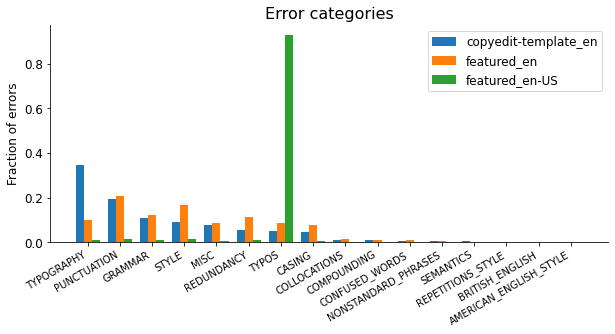

In [9]:
alpha=1
ms = 0
lw=2

width = 0.25
fig = plt.figure(figsize=(10,4 ))
ax = fig.add_subplot(1,1,1)


cm=plt.colormaps.get("tab10")

for i_p,arr_p in enumerate(list_arr_p):
    dataset = list_datasets[i_p]
    arr_x = np.arange(len(list_labels_ordered))
    offset = (i_p-1)*width
    ax.bar(arr_x+offset,arr_p, width=width,color = cm(i_p),label=dataset)
    
ax.set_xticks(arr_x)
_=ax.set_xticklabels(list_labels_ordered,rotation=30,ha='right')
ax.legend()
ax.set_ylabel("Fraction of errors")
ax.set_title("Error categories")

### rule types

In [10]:
list_datasets = ["copyedit-template_en","featured_en","featured_en-US"]
list_c = [c3_rtype,c2_rtype,c1_rtype]


# get all labels
list_labels = []
for c in list_c:
    list_labels+=list(c.keys())
list_labels = list(set(list_labels))

# order the labels according to on cat
list_norder = []
for label in list_labels:
    list_norder += [list_c[0].get(label,0)]

ind_argsort = np.argsort(list_norder)[::-1]
list_labels_ordered = [list_labels[i] for i in ind_argsort]

list_arr_p = []
for c in list_c:
    arr_n = []
    for label in list_labels_ordered:
        arr_n += [c.get(label,0)]
    arr_p = np.array(arr_n)/np.sum(arr_n)
    list_arr_p+=[arr_p]
print(list_labels_ordered)
print(list_arr_p)

['whitespace', 'typographical', 'style', 'grammar', 'misspelling', 'duplication', 'uncategorized', 'inconsistency', 'locale-violation']
[array([3.35833902e-01, 2.44979920e-01, 1.46548458e-01, 1.18132909e-01,
       1.16465863e-01, 1.82617261e-02, 1.64431310e-02, 3.18254149e-03,
       1.51549595e-04]), array([0.09140191, 0.27308799, 0.28095398, 0.13829044, 0.17516137,
       0.01437673, 0.02394724, 0.00238914, 0.0003912 ]), array([6.92543355e-03, 2.06916118e-02, 2.21143850e-02, 1.04749564e-02,
       9.35495652e-01, 1.08825217e-03, 1.81445936e-03, 1.81022491e-04,
       1.21422689e-03])]


In [11]:
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

Text(0.5, 1.0, 'Error ruletypes')

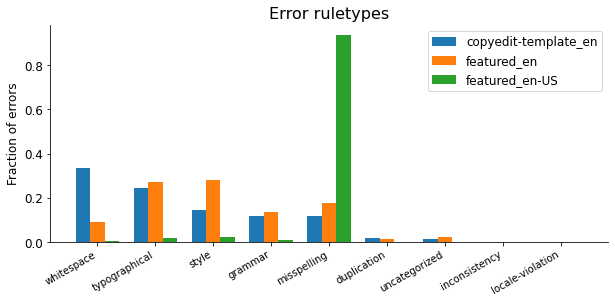

In [12]:
alpha=1
ms = 0
lw=2

width = 0.25
fig = plt.figure(figsize=(10,4 ))
ax = fig.add_subplot(1,1,1)


cm=plt.colormaps.get("tab10")

for i_p,arr_p in enumerate(list_arr_p):
    dataset = list_datasets[i_p]
    arr_x = np.arange(len(list_labels_ordered))
    offset = (i_p-1)*width
    ax.bar(arr_x+offset,arr_p, width=width,color = cm(i_p),label=dataset)
    
ax.set_xticks(arr_x)
_=ax.set_xticklabels(list_labels_ordered,rotation=30,ha='right')
ax.legend()
ax.set_ylabel("Fraction of errors")
ax.set_title("Error ruletypes")